# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [44]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from panel.interact import interact
from panel import widgets
from pathlib import Path
from dotenv import load_dotenv

In [45]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [46]:
# Import the necessary CSVs to Pandas DataFrames

file_path = Path("mean_housing_units.csv")
mean_housing_units = pd.read_csv(file_path, index_col="year")
mean_housing_units

file_path = Path("mean_sale_price_per_sq_foot.csv")
mean_sale_price_per_sq_foot = pd.read_csv(file_path, index_col="year")
mean_sale_price_per_sq_foot

file_path = Path("mean_monthly_rent.csv")
mean_monthly_rent = pd.read_csv(file_path, index_col="year")
mean_monthly_rent

file_path = Path("mean_prices_for_year_and_neighborhood.csv")
mean_prices_for_year_and_neighborhood = pd.read_csv(file_path, index_col="year")
mean_prices_for_year_and_neighborhood

file_path = Path("top_10_expensive.csv")
top_10_expensive = pd.read_csv(file_path)
top_10_expensive

file_path = Path("new_top_10_expensive_neighborhoods.csv")
new_top_10_expensive_neighborhoods = pd.read_csv(file_path, index_col="year")
new_top_10_expensive_neighborhoods

file_path = Path("joined_sfo_data_with_coordinates.csv")
joined_sfo_data_with_coordinates = pd.read_csv(file_path)
joined_sfo_data_with_coordinates

file_path = Path("df_expensive_neighborhoods_per_year.csv")
df_expensive_neighborhoods_per_year = pd.read_csv(file_path)
df_expensive_neighborhoods_per_year


,Unnamed: 0,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,7,2010,Cow Hollow,569.379968,372560,1239
1,31,2010,Miraloma Park,680.608729,372560,1239
2,41,2010,Pacific Heights,496.516014,372560,1239
3,46,2010,Potrero Hill,491.450004,372560,1239
4,47,2010,Presidio Heights,549.417931,372560,1239
5,49,2010,South Beach,1037.099789,372560,1239
6,52,2010,Telegraph Hill,524.793509,372560,1239
7,54,2010,Union Square District,569.193448,372560,1239
8,67,2011,Cow Hollow,390.595653,374507,1530
9,89,2011,Miraloma Park,414.676065,374507,1530


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [47]:
# Define Panel Visualization Functions
def get_housing_units_per_year():
    """Housing Units Per Year."""
    
    mean_housing_units_plot = mean_housing_units.plot.bar(
        ylim=(370000, 387500), 
        figsize=(20,10), 
        title="Housing Units in San Francisco From 2010 to 2016", 
        rot=45, 
        fontsize=15, 
        xlabel="Year", 
        ylabel="Housing Units"
    )
    return mean_housing_units_plot



def get_average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    mean_monthly_rent.plot(
        ylim=(1200, 4500), 
        figsize=(20,10), 
        title="Average Monthly Rent By Year", 
        rot=45, 
        fontsize=15, 
        xlabel="Year", 
        ylabel="Monthly Rent",
        color="blue"
    )
    return mean_monthly_rent


def get_average_sales_price():
    """Average Sales Price Per Year."""
    
    mean_sale_price_per_sq_foot.plot(
        ylim=(300, 700), 
        figsize=(20,10), 
        title="Average Sale Price Per Square Foot By Year", 
        rot=45, 
        fontsize=15, 
        xlabel="Year", 
        ylabel="Housing Units",
        color="red"
    )
    return mean_sale_price_per_sq_foot


def get_average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    average_monthly_rent = mean_prices_for_year_and_neighborhood.hvplot(
        x="year",
        y="gross_rent",
        kind="line",
        ylabel="Average Monthly Rent",
        groupby="neighborhood",
        color="pink"
    )
    return average_monthly_rent


def get_top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    top_10_expensive_plot = top_10_expensive.plot.bar(
        x="neighborhood",
        y="sale_price_sqr_foot",
        ylim=(600, 1000), 
        figsize=(20,10), 
        title="Top 10 Expensive Neighborhoods in San Francisco", 
        rot=45, 
        fontsize=15, 
        xlabel="Top 10 Expensive Neighborhoods", 
        ylabel="Average Sale Price Per Square Foot",
    )
    return top_10_expensive_plot

def get_most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    new_top_10_expensive_neighborhoods_plot = new_top_10_expensive_neighborhoods.hvplot.bar(
        x="year",
        y=["gross_rent", "sale_price_sqr_foot"],
        groupby="neighborhood",
        value_label="Num Housing Units",
        xlabel="Neighborhood",
        stacked=False,
        rot=70,
        width=800,
        height=400,
        title="SFO Comparison Of Average Price Per Square Foot VS Average Montly Rent By Year"
    )
    return new_top_10_expensive_neighborhoods_plot
    
    
def get_parallel_coordinates():
    """Parallel Coordinates Plot."""

    parallel_coordinates_plot = px.parallel_coordinates(
        top_10_expensive, 
        dimensions=[
            "sale_price_sqr_foot", 
            "housing_units",
            "gross_rent"
        ],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.diverging.Tealrose,
        height=400,
        width=1300,
        labels={
            'sale_price_sqr_foot':'Sale Price Per Square Foot', 
            'housing_units':'Housing Units',
            'gross_rent':'Gross Rent'
        }
    )
    return parallel_coordinates_plot


def get_parallel_categories():
    """Parallel Categories Plot."""
    
    parallel_categories_plot = px.parallel_categories(
        top_10_expensive, 
        dimensions=[
            "neighborhood", 
            "sale_price_sqr_foot", 
            "housing_units",
            "gross_rent"
        ],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.diverging.Tealrose,
        height=400,
        width=1300,
        labels={
            'neighborhood':'Neighborhood', 
            'sale_price_sqr_foot':'Sale Price Per Square Foot', 
            'housing_units':'Housing Units',
            'gross_rent':'Gross Rent'
        }
    )
    return parallel_categories_plot


def get_neighborhood_map():
    """Neighborhood Map."""

    neighborhood_scatter_mapbox = px.scatter_mapbox(
        joined_sfo_data_with_coordinates, 
        lat="Lat", 
        lon="Lon",     
        color="gross_rent", 
        size="sale_price_sqr_foot",
        title="Average Sale Price Per Square Foot and Gross Rent In San Francisco",
        color_continuous_scale=px.colors.sequential.Bluered, 
        hover_name="neighborhood",
        size_max=15,
        zoom=10,
        width=1000, 
        height=1000
    )
    return neighborhood_scatter_mapbox

def get_sunburst():
    """Sunburst Plot."""
    
    df_expensive_neighborhoods_per_year_sunburst = px.sunburst(
        df_expensive_neighborhoods_per_year, 
        path=[
            'year', 
            'neighborhood'
        ], 
        values='sale_price_sqr_foot',
        color='gross_rent', 
        title="Costs Analysis of Most Expensive Neighborhoods in San Francisco Per Year",
        color_continuous_scale=px.colors.sequential.Blackbody,
        width=800,
        height=800
    )
    return df_expensive_neighborhoods_per_year_sunburst
    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(AxesSubplot)
        [3] Markdown(str)
        [4] DataFrame(DataFrame)
        [5] Markdown(str)
        [6] DataFrame(DataFrame)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [3] Markdown(str)
        [4] Str(AxesSubplot)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure, visible=False)
        [3] Markdown(str)
        [4] Plotly(Figure, visible=False)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)
        [2] Markdown(str)
        [3] Plotly(Figure, visible=False)

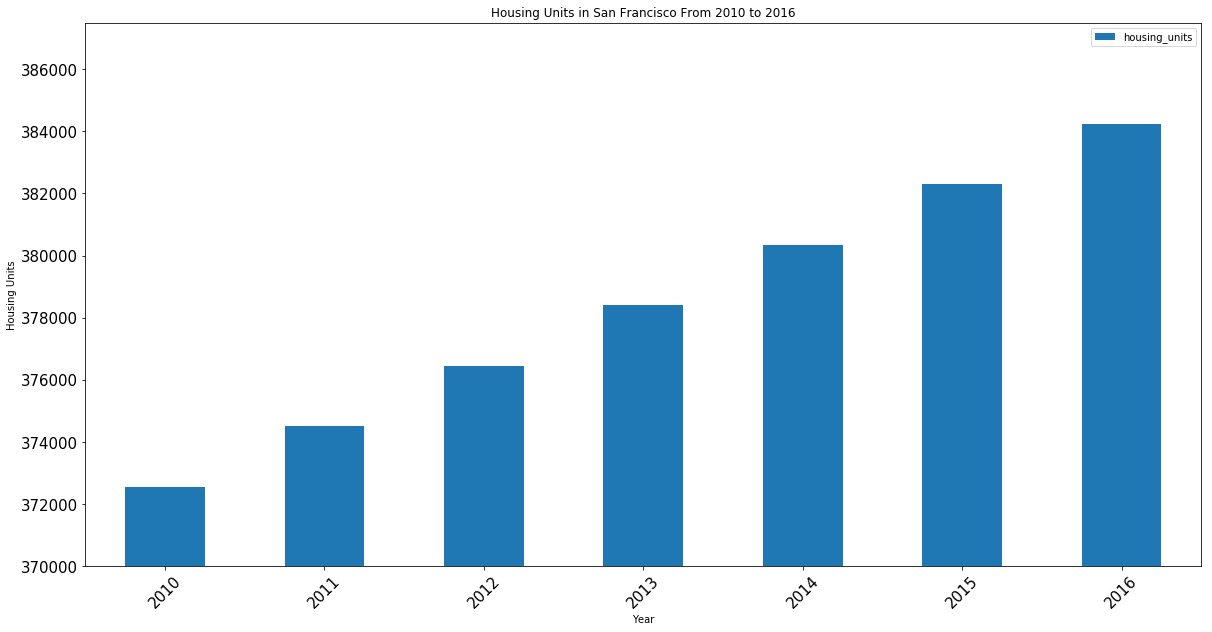

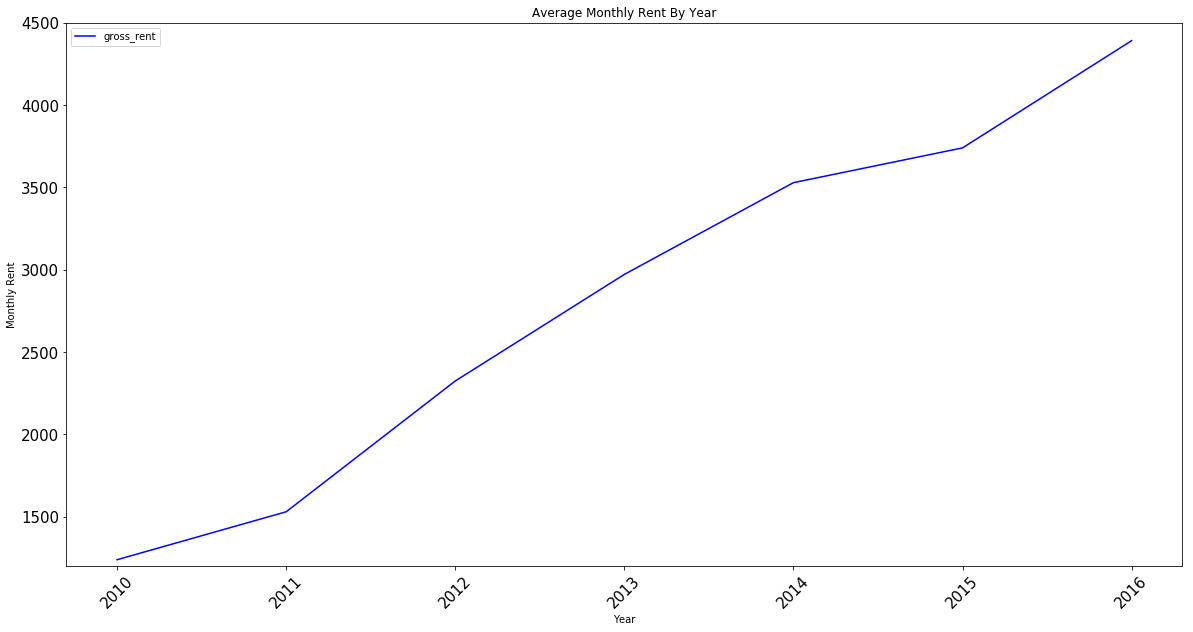

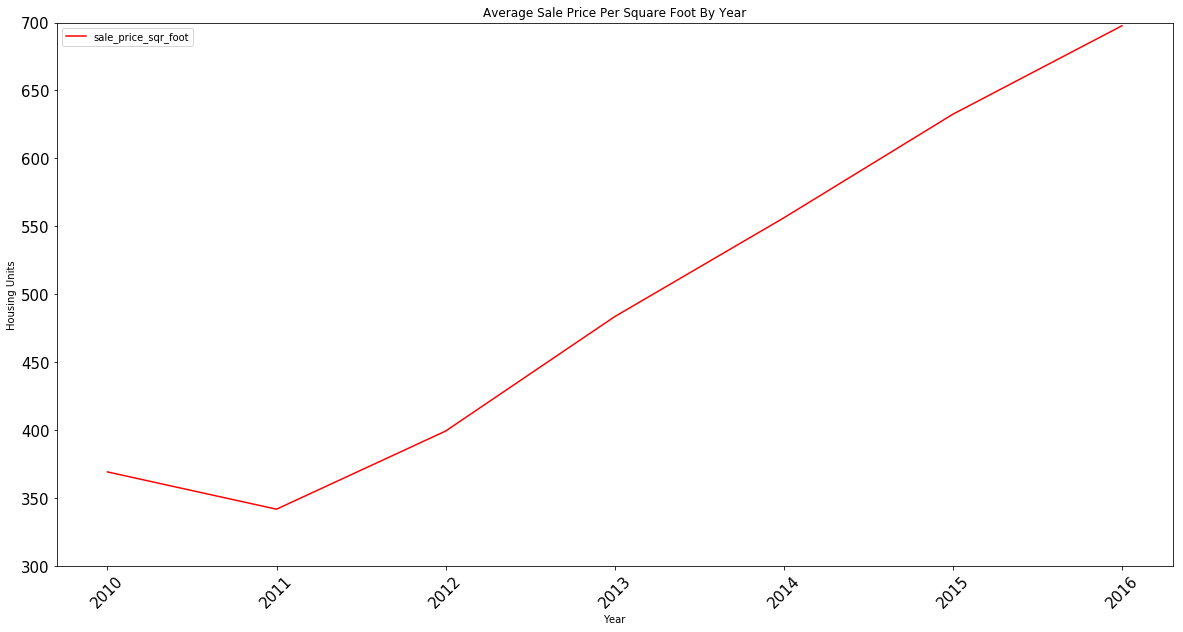

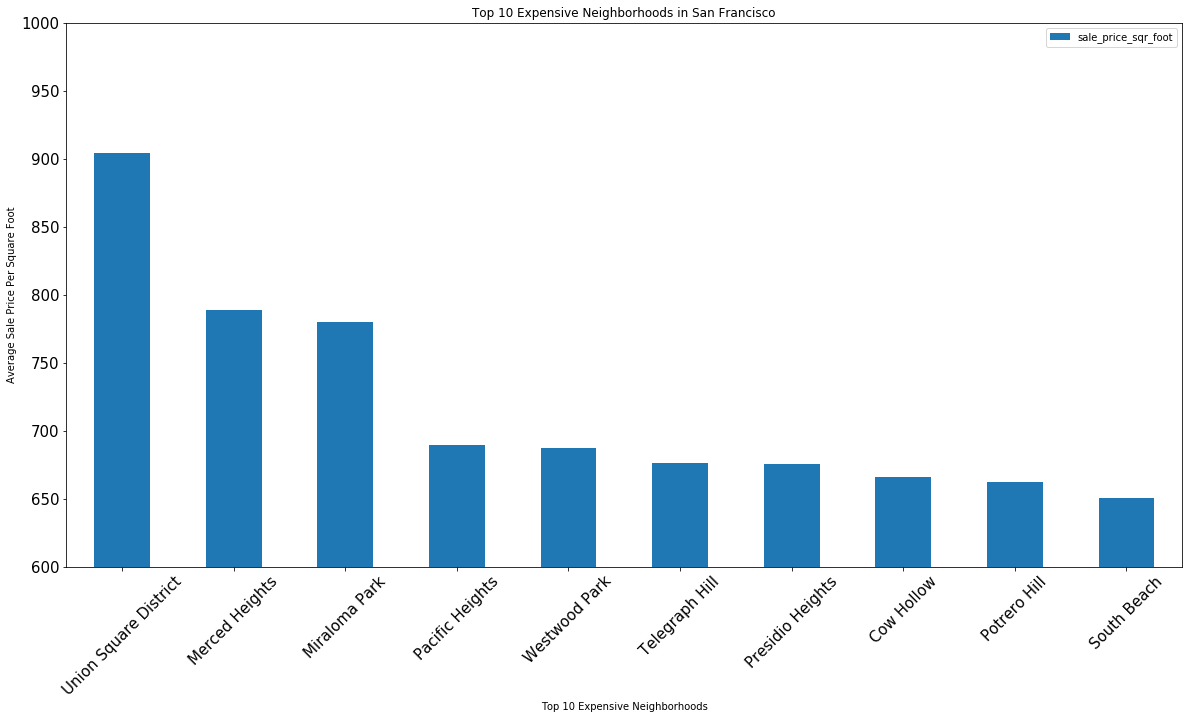

In [48]:
# Create a Title for the Dashboard
#rental properties in San Francisco


Intro = pn.pane.Markdown(
"""
San Francisco - the gem of the West.

Let's show you why you should invest.

Positively improve your Real Estate Portfolio!
  
"""
)

#Tabs with data 
tab_1 = pn.Column(
    ("# San Francisco Housing Rental Analysis - 2010 to 2016"),
    ("## Housing Units Per Year"),
    get_housing_units_per_year(),
    ("## Average Gross Rent in San Francisco Per Year."),
    get_average_gross_rent(),
    ("## Average Sales Price Per Year"),
    get_average_sales_price()
)

tab_2 = pn.Column(
    ("# San Francisco Neighborhood Analysis - 2010 to 2016"),
    ("## Average Prices by Neighborhood"),
    get_average_price_by_neighborhood(),
    ("## Top 10 Most Expensive Neighborhoods"),
    get_top_most_expensive_neighborhoods()
)

tab_3 = pn.Column(
        ("# Parallel Coordinates and Parallel Categories Analysis"),
    ("## Parallel Coordinates Plot"),
    get_parallel_coordinates(),
    ("## Parallel Categories Plot"),
    get_parallel_categories()
)

tab_4 = pn.Column(
    ("# Averange Sale Price Per Square Foot and Gross Rent in San Francisco"),
    get_neighborhood_map(),
    ("#Sunburst Plot"),
    get_sunburst()
)

# Create dashboard Tabs
sfo_dashboard = pn.Tabs(
    ("Intro",Intro),
    ("Rental Analysis", tab_1),
    ("Neighborhood Analysis", tab_2),
    ("Parallel",tab_3),
    ("Map Analysis", tab_4)
)

# Serve the dashboard
sfo_dashboard.servable()

## Serve the Panel Dashboard

In [38]:
# Serve the# dashboard
#sfo_dashboard.servable()

Traceback (most recent call last):
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 669, in unhold
 self._trigger_on_change(event)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1180, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1198, in _with_self_as_curdoc
 return f()
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/util/callback_manager.py", line 161, in invoke
 callback(attr, old, new)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 301, in _comm_change
 self._process_events({attr: new})
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 262, in _process_events
 self.param.set_param(**self_events)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1526, in set_param
 self_._batch_call_watchers()
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1665, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1627, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 520, in caller
 return function()
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 351, in _depends
 return func(*args,**kw)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/pane/plotly.py", line 153, in _update_figure_layout
 self._figure.plotly_relayout(self.relayout_data)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2601, in plotly_relayout
 relayout_changes = self._perform_plotly_relayout(relayout_data)
 File "/Users/moniqueferguson/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2641, in _perform_plotly_relayout
 key_path_str=key_path_str
ValueError: 
Invalid property path 'mapbox._derived' for layout

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(AxesSubplot)
        [3] Markdown(str)
        [4] DataFrame(DataFrame)
        [5] Markdown(str)
        [6] DataFrame(DataFrame)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [3] Markdown(str)
        [4] Str(AxesSubplot)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure, visible=False)
        [3] Markdown(str)
        [4] Plotly(Figure, visible=False)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)
        [2] Markdown(str)
        [3] Plotly(Figure, visible=False)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()